# Data Exploration and Analysis pt.2

For this project I am also interested in the frequency of overs and unders hitting for a month period. I have purchased the box scores for the 2024-2025 NHL season with Over/Under lines and odds from [BigDataBall.com](https://www.bigdataball.com/datasets/nhl/team/2024-2025/).

This notebook explores and cleans the data from the excel sheet I obtained.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
games_all_data_df = pd.read_excel("./data/2024-2025_NHL_Box_Score_Team-Stats.xlsx", sheet_name="NHL-2024-25-TEAM", header=1)

In [4]:
games_all_data_df.columns

Index(['BIGDATABALL\nDATASET', 'GAME-ID', 'DATE', 'TEAMS', 'VENUE', '1P', '2P',
       '3P', 'OT', 'SO\n2OT', 'FINAL\nSCORE', 'REST DAYS', 'SHIFTS',
       'SHOTS ON GOAL', 'SHOTS MISSED', 'BLOCKS', 'ASSISTS', 'POINTS',
       'PENALTIES', 'PENALTY IN MINUTES', 'HITS', 'TAKE AWAYS', 'GIVE AWAYS',
       'FACEOFFS\nWON', 'FACEOFFS\nLOST', 'ES \nTOI', 'ES GOALS', 'ES ASSISTS',
       'ES POINTS', 'PP \nTOI', 'PP GOALS', 'PP ASSISTS', 'PP POINTS',
       'SH \nTOI', 'SH GOALS', 'SH ASSISTS', 'SH POINTS', 'GOALIE\n#1',
       'GOALIE\n#2', 'TOTAL\nGOALS\nAGAINST', 'TOTAL\nSHOTS AGAINST',
       'TOTAL\nSAVES', 'SAVE\nPCT', 'ES TOTAL\nSAVES', 'PP TOTAL\nSAVES',
       'SH TOTAL\nSAVES', 'SHUTOUT', 'OPENING\nO/U', 'OPENING\nMONEYLINE',
       'MOVEMENT \n#1', 'MOVEMENT \n#2', 'MOVEMENT \n#3', 'CLOSING\nO/U',
       'CLOSING\nMONEYLINE', 'CLOSING\nPUCK LINE'],
      dtype='object')

In [ ]:
#Clean column names to remove newline characters, spaces, and O/U replaced with OVER_UNDER
games_all_data_df.columns = (
    games_all_data_df.columns
    .str.replace('\n', '_', regex=True)
    .str.replace(' ', '_', regex=True)
    .str.replace('O/U', 'OVER_UNDER', regex=True)
)

In [6]:
games_all_data_df.columns

Index(['BIGDATABALL_DATASET', 'GAME-ID', 'DATE', 'TEAMS', 'VENUE', '1P', '2P',
       '3P', 'OT', 'SO_2OT', 'FINAL_SCORE', 'REST_DAYS', 'SHIFTS',
       'SHOTS_ON_GOAL', 'SHOTS_MISSED', 'BLOCKS', 'ASSISTS', 'POINTS',
       'PENALTIES', 'PENALTY_IN_MINUTES', 'HITS', 'TAKE_AWAYS', 'GIVE_AWAYS',
       'FACEOFFS_WON', 'FACEOFFS_LOST', 'ES__TOI', 'ES_GOALS', 'ES_ASSISTS',
       'ES_POINTS', 'PP__TOI', 'PP_GOALS', 'PP_ASSISTS', 'PP_POINTS',
       'SH__TOI', 'SH_GOALS', 'SH_ASSISTS', 'SH_POINTS', 'GOALIE_#1',
       'GOALIE_#2', 'TOTAL_GOALS_AGAINST', 'TOTAL_SHOTS_AGAINST',
       'TOTAL_SAVES', 'SAVE_PCT', 'ES_TOTAL_SAVES', 'PP_TOTAL_SAVES',
       'SH_TOTAL_SAVES', 'SHUTOUT', 'OPENING_OVER_UNDER', 'OPENING_MONEYLINE',
       'MOVEMENT__#1', 'MOVEMENT__#2', 'MOVEMENT__#3', 'CLOSING_OVER_UNDER',
       'CLOSING_MONEYLINE', 'CLOSING_PUCK_LINE'],
      dtype='object')

In [7]:
#data includes regular season and playoffs
games_all_data_df['BIGDATABALL_DATASET'].unique()

array(['NHL 2024-2025 Regular Season', 'NHL 2025 Playoffs'], dtype=object)

In [8]:
game_ids = games_all_data_df['GAME-ID'].unique()
print(f"Number of games: {game_ids.shape[0]}")

Number of games: 1398


In [9]:
#data about game date for analysis
games_all_data_df["DATE"] = pd.to_datetime(games_all_data_df["DATE"], format="%m/%d/%y")
games_all_data_df["YEAR"] = games_all_data_df["DATE"].dt.year
games_all_data_df["MONTH"] = games_all_data_df["DATE"].dt.month
games_all_data_df["DAY"] = games_all_data_df["DATE"].dt.day
games_all_data_df["DAY_OF_WEEK"] = games_all_data_df["DATE"].dt.day_name()

In [ ]:
# The data set has "even" for odds that are even
# Replace 'even' (case-insensitive) with '+100'
# this can than be used to calculate payouts

games_all_data_df['CLOSING_OVER_UNDER'] = games_all_data_df['CLOSING_OVER_UNDER'].str.replace(r'(?i)even', '+100', regex=True)

In [ ]:
#Split the CLOSING_OVER_UNDER column into more meaningful and useful
#columns for later analysis
#Every game has two row entries.
#One has the OVER line and odds (6.5o -150)
#the other has the UNDER line and odds (6.5u +100)
pattern = r'(?P<number>[\d\.]+)(?P<ou>[ou])\s*(?P<odds>[+-]?\d+)'

parsed = games_all_data_df['CLOSING_OVER_UNDER'].str.extract(pattern)

games_all_data_df['OVER'] = parsed.apply(lambda row: row['number'] if row['ou'] == 'o' else '', axis=1)
games_all_data_df['UNDER'] = parsed.apply(lambda row: row['number'] if row['ou'] == 'u' else '', axis=1)
games_all_data_df['UNDER_ODDS'] = parsed.apply(lambda row: row['odds'] if row['ou'] == 'u' else '', axis=1)
games_all_data_df['OVER_ODDS'] = parsed.apply(lambda row: row['odds'] if row['ou'] == 'o' else '', axis=1)

In [12]:
games_all_data_df.head(5)

,BIGDATABALL_DATASET,GAME-ID,DATE,TEAMS,VENUE,1P,2P,3P,OT,SO_2OT,...,CLOSING_MONEYLINE,CLOSING_PUCK_LINE,YEAR,MONTH,DAY,DAY_OF_WEEK,OVER,UNDER,UNDER_ODDS,OVER_ODDS
0,NHL 2024-2025 Regular Season,45569-NJ@BUF,2024-10-04,New Jersey Devils,Neutral,2,1,1,NaN,NaN,...,-148,-1.5 +164,2024,10,4,Friday,6.5,,,+102
1,NHL 2024-2025 Regular Season,45569-NJ@BUF,2024-10-04,Buffalo Sabres,Neutral,0,0,1,NaN,NaN,...,+124,+1.5 -198,2024,10,4,Friday,,6.5,-122,
2,NHL 2024-2025 Regular Season,45570-BUF@NJ,2024-10-05,Buffalo Sabres,Road,0,1,0,NaN,NaN,...,+120,+1.5 -205,2024,10,5,Saturday,6.5,,,-105
3,NHL 2024-2025 Regular Season,45570-BUF@NJ,2024-10-05,New Jersey Devils,Home,0,1,2,NaN,NaN,...,-142,-1.5 +170,2024,10,5,Saturday,,6.5,-115,
4,NHL 2024-2025 Regular Season,45573-STL@SEA,2024-10-08,St. Louis Blues,Road,0,3,0,NaN,NaN,...,+124,+1.5 -205,2024,10,8,Tuesday,6,,,+100


In [ ]:
#reduce the data to content we care about
games_data_df = games_all_data_df[['GAME-ID',"TEAMS", "FINAL_SCORE", "VENUE", "YEAR", "MONTH", "DAY", "DAY_OF_WEEK", "DATE", "OVER", "UNDER", "OVER_ODDS", "UNDER_ODDS"]]

In [14]:
games_data_df.head(2)

,GAME-ID,TEAMS,FINAL_SCORE,VENUE,YEAR,MONTH,DAY,DAY_OF_WEEK,DATE,OVER,UNDER,OVER_ODDS,UNDER_ODDS
0,45569-NJ@BUF,New Jersey Devils,4,Neutral,2024,10,4,Friday,2024-10-04,6.5,,+102,
1,45569-NJ@BUF,Buffalo Sabres,1,Neutral,2024,10,4,Friday,2024-10-04,,6.5,,-122


In [ ]:
#As stated above, each game has a row for the home and away team
#copilot with the assist to combine the two rows for a game into one row
combined_games_df = (
    games_data_df
    .groupby('GAME-ID', as_index=False)
    .agg({
        'TEAMS': ' & '.join,           # join team names with ' & '
        'FINAL_SCORE': 'sum',          # sum the scores
        'VENUE': 'first',              # keep first (or use another aggregation if needed)
        'YEAR': 'first',
        'MONTH': 'first',
        'DAY': 'first',
        'DAY_OF_WEEK': 'first',
        'DATE': 'first',
        'OVER': 'max',                 # get the non-empty value
        'UNDER': 'max',                # get the non-empty value
        'OVER_ODDS': 'max',            # get the non-empty value
        'UNDER_ODDS': 'max'   
    })
)

In [16]:
combined_games_df.head(6)

,GAME-ID,TEAMS,FINAL_SCORE,VENUE,YEAR,MONTH,DAY,DAY_OF_WEEK,DATE,OVER,UNDER,OVER_ODDS,UNDER_ODDS
0,45569-NJ@BUF,New Jersey Devils & Buffalo Sabres,5,Neutral,2024,10,4,Friday,2024-10-04,6.5,6.5,+102,-122
1,45570-BUF@NJ,Buffalo Sabres & New Jersey Devils,4,Road,2024,10,5,Saturday,2024-10-05,6.5,6.5,-105,-115
2,45573-BOS@FLA,Boston Bruins & Florida Panthers,10,Road,2024,10,8,Tuesday,2024-10-08,5.5,5.5,-115,-105
3,45573-CHI@UTA,Chicago Blackhawks & Utah Hockey Club,7,Road,2024,10,8,Tuesday,2024-10-08,6,6,-130,+110
4,45573-STL@SEA,St. Louis Blues & Seattle Kraken,5,Road,2024,10,8,Tuesday,2024-10-08,6,6,+100,-120
5,45574-CGY@VAN,Calgary Flames & Vancouver Canucks,11,Road,2024,10,9,Wednesday,2024-10-09,6.5,6.5,+102,-122


In [ ]:
#define the numerics
cols_to_float = ['OVER', 'UNDER', 'FINAL_SCORE', 'OVER_ODDS', 'UNDER_ODDS']
for col in cols_to_float:
    combined_games_df[col] = pd.to_numeric(combined_games_df[col], errors='coerce')


In [ ]:
#define two columns, OVER_HIT and UNDER_HIT 
#True, False or "push" (if the line and final score are equal)
def set_over_hit(row):
    if row['FINAL_SCORE'] == row['OVER']:
        return 'push'
    elif row['FINAL_SCORE'] > row['OVER']:
        return True
    else:
        return False
    
def set_under_hit(row):
    if row['FINAL_SCORE'] == row['UNDER']:
        return 'push'
    elif row['FINAL_SCORE'] < row['UNDER']:
        return True
    else:
        return False

combined_games_df['OVER_HIT'] = combined_games_df.apply(set_over_hit, axis=1)
combined_games_df['UNDER_HIT'] = combined_games_df.apply(set_under_hit, axis=1)

In [19]:
combined_games_df.head(5)

,GAME-ID,TEAMS,FINAL_SCORE,VENUE,YEAR,MONTH,DAY,DAY_OF_WEEK,DATE,OVER,UNDER,OVER_ODDS,UNDER_ODDS,OVER_HIT,UNDER_HIT
0,45569-NJ@BUF,New Jersey Devils & Buffalo Sabres,5,Neutral,2024,10,4,Friday,2024-10-04,6.5,6.5,102,-122,False,True
1,45570-BUF@NJ,Buffalo Sabres & New Jersey Devils,4,Road,2024,10,5,Saturday,2024-10-05,6.5,6.5,-105,-115,False,True
2,45573-BOS@FLA,Boston Bruins & Florida Panthers,10,Road,2024,10,8,Tuesday,2024-10-08,5.5,5.5,-115,-105,True,False
3,45573-CHI@UTA,Chicago Blackhawks & Utah Hockey Club,7,Road,2024,10,8,Tuesday,2024-10-08,6.0,6.0,-130,110,True,False
4,45573-STL@SEA,St. Louis Blues & Seattle Kraken,5,Road,2024,10,8,Tuesday,2024-10-08,6.0,6.0,100,-120,False,True


## Visualize the number of times an over and under hit by month

/var/folders/_d/q93wl35s5m5fv4pwm6x0v5lh0000gn/T/ipykernel_6214/959021034.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  }).fillna(0)


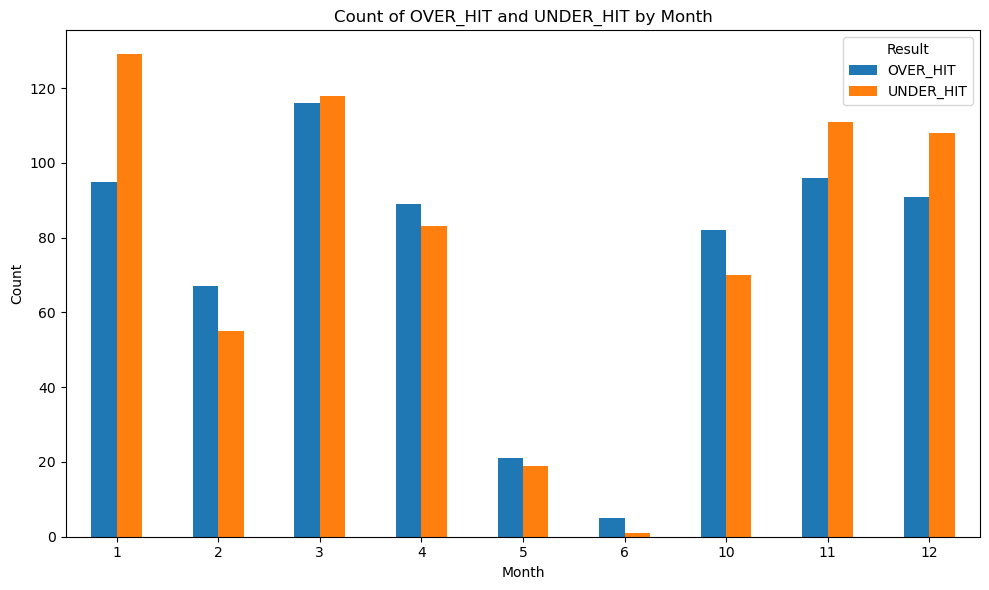

In [20]:
# Count the number of times OVER_HIT and UNDER_HIT for each MONTH (excluding 'push')
over_counts = combined_games_df[combined_games_df['OVER_HIT'] != 'push'].groupby('MONTH')['OVER_HIT'].sum()
under_counts = combined_games_df[combined_games_df['UNDER_HIT'] != 'push'].groupby('MONTH')['UNDER_HIT'].sum()

# Prepare DataFrame for plotting
counts_df = pd.DataFrame({
    'OVER_HIT': over_counts,
    'UNDER_HIT': under_counts
}).fillna(0)

# Plot grouped bar chart
counts_df.plot(kind='bar', figsize=(10,6))
plt.title('Count of OVER_HIT and UNDER_HIT by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Result')
plt.tight_layout()
plt.show()

In [21]:
overs_hit_all_year = combined_games_df[combined_games_df['OVER_HIT'] != 'push']['OVER_HIT'].sum()
unders_hit_all_year = combined_games_df[combined_games_df['UNDER_HIT'] != 'push']['UNDER_HIT'].sum()
print(f"Overs hit in 2024-2025: {overs_hit_all_year}")
print(f"Under hit in 2024-2025: {unders_hit_all_year}")
total_games = combined_games_df.shape[0]
percent_over =  overs_hit_all_year / total_games * 100
percent_under = unders_hit_all_year / total_games * 100
print(f"Over Hit Rate: %{percent_over:.2f}")
print(f"Under Hit Rate: %{percent_under:.2f}")

Overs hit in 2024-2025: 662
Under hit in 2024-2025: 694
Over Hit Rate: %47.35
Under Hit Rate: %49.64
